In [27]:
import numpy
import pandas as pd

df = pd.read_csv('international-airline-passengers.csv')
df = df.dropna()
df = df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60': 'y', 'Month': 'ds'})

In [28]:
# 学習
from fbprophet import Prophet

m = Prophet()
m.fit(df[:-25])

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
future = m.make_future_dataframe(freq="M", periods=25)
forecast = m.predict(future)

In [36]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,109.161032,66.966225,111.525895,109.161032,109.161032,-20.023100,-20.023100,-20.023100,-20.023100,-20.023100,-20.023100,0.0,0.0,0.0,89.137932
1,1949-02-01,111.308951,59.321055,106.614367,111.308951,111.308951,-28.097441,-28.097441,-28.097441,-28.097441,-28.097441,-28.097441,0.0,0.0,0.0,83.211510
2,1949-03-01,113.249007,95.286893,141.682308,113.249007,113.249007,4.706001,4.706001,4.706001,4.706001,4.706001,4.706001,0.0,0.0,0.0,117.955007
3,1949-04-01,115.396925,86.322778,133.017106,115.396925,115.396925,-5.072395,-5.072395,-5.072395,-5.072395,-5.072395,-5.072395,0.0,0.0,0.0,110.324531
4,1949-05-01,117.475557,87.652492,135.639918,117.475557,117.475557,-6.201686,-6.201686,-6.201686,-6.201686,-6.201686,-6.201686,0.0,0.0,0.0,111.273870
5,1949-06-01,119.623475,124.085681,171.369722,119.623475,119.623475,28.399175,28.399175,28.399175,28.399175,28.399175,28.399175,0.0,0.0,0.0,148.022650
6,1949-07-01,121.702106,154.672473,199.524624,121.702106,121.702106,55.966157,55.966157,55.966157,55.966157,55.966157,55.966157,0.0,0.0,0.0,177.668264
7,1949-08-01,123.850025,155.117806,200.914547,123.850025,123.850025,54.848125,54.848125,54.848125,54.848125,54.848125,54.848125,0.0,0.0,0.0,178.698150
8,1949-09-01,125.997944,114.874657,161.634430,125.997944,125.997944,12.773441,12.773441,12.773441,12.773441,12.773441,12.773441,0.0,0.0,0.0,138.771385
9,1949-10-01,128.076575,84.277584,128.365474,128.076575,128.076575,-22.403456,-22.403456,-22.403456,-22.403456,-22.403456,-22.403456,0.0,0.0,0.0,105.673119


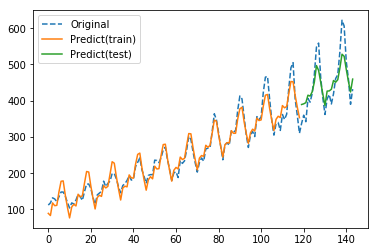

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.y.plot(ax=ax, label='Original', linestyle="dashed")
forecast.yhat[:-25].plot(ax=ax, label='Predict(train)')
forecast.yhat[-25:].plot(ax=ax, label='Predict(test)')
ax.legend()

In [42]:
# 精度
(df.y[-25:]-forecast.yhat[-25:]).abs().mean()

32.29267466578526